In [ ]:
!pip install tweepy  #Installing Tweepy for twitter data

**Tweets extracted 11/8/2020**

In [ ]:
#Program to get twitter data using Twitter API 

import json
import csv
import tweepy
import re
import os
def twitter_hashtag(api_key, api_key_secret, access_token, access_token_secret, hashtag):
    
    auth = tweepy.OAuthHandler(api_key, api_key_secret)
    auth.set_access_token(access_token, access_token_secret)

    api = tweepy.API(auth,wait_on_rate_limit=True)
    
    file_name = '_'.join(re.findall(r"#(\w+)", hashtag))

    with open('%s.csv' % (file_name), 'w') as file:

        w = csv.writer(file)

        w.writerow(['created', 'user_location', 'tweet_text', 'username', 'all_hashtags'])

        for tweet in tweepy.Cursor(api.search, q=hashtag+' -filter:retweets', lang="en", tweet_mode='extended').items(1000):
            w.writerow([tweet.created_at, tweet.full_text.replace('\n',' ').encode('utf-8'), tweet.user.screen_name.encode('utf-8'),[e['text'] for e in tweet._json['entities']['hashtags']]])
            


api_key = input('Please give twitter api key')
api_key_secret = input('Please give twitter api key secret')
access_token = input('Please give twitter access token')
access_token_secret = input('Please give twitter access token secret')
    
hashtag = input('enter the hashtag')

twitter_hashtag(api_key, api_key_secret, access_token, access_token_secret, hashtag)



Please give twitter api keyePjdnPqsmA5Mgjewf5i5Vtnuw
Please give twitter api key secretV83Stor4JRihnxggUa9OODxIrAc8EHmQdJxlnpxAGZXjqbJA7v
Please give twitter access token1287853629869821952-ZsnNF12Y53o5JfCOUBPn72lO0OJau1
Please give twitter access token secretTSYcER5dl5L72dcbpo8f0LzQqfn6qX3r2n1QsLpOGxRAz
enter the hashtag#IPL2020


In [122]:
#Saving the twitter data to a csv file
import pandas as pd
tweets=pd.read_csv('/content/sample_data/IPL2020_final.csv')
tweets.head()

,created,user_location,tweet_text,username,all_hashtags
0,11/9/2020 4:49,Gotham City,b'Look at #SRH youngster Priyam Garg after Kan...,b'SteadyTheShip',"['SRH', 'SRHvDC', 'DCvSRH', 'IPL2020']"
1,11/9/2020 4:49,"Bengaluru South, India",b'This is Mr.360\xc2\xb0 @ABdeVilliers17 . Mos...,b'imsapien',"['Cricket', 'IPL2020', 'Eliminater', 'IPLQuali..."
2,11/9/2020 4:48,"Chennai, India","b""Great things happen to those who don't stop ...",b'CricketGirl_45',"['RohitSharma', 'MumbaiIndians', 'IPL2020', 'I..."
3,11/9/2020 4:48,"Chennai, India",b'T Natarajan made a mark with his yorkers in ...,b'ESPNcricinfo',['IPL2020']
4,11/9/2020 4:47,"Kerala, India",b'#IPL2020 Final: Marcus Stoinis warning to @m...,b'InsideSportIND',"['IPL2020', 'iplseason13', 'IPLfinal', 'Mumbai..."


In [123]:
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns


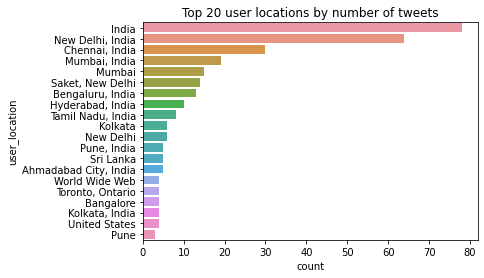

In [124]:
ds = tweets['user_location'].value_counts().reset_index()
ds.columns = ['user_location', 'count']
ds = ds[ds['user_location']!='NA']
ds = ds.sort_values(['count'],ascending=False)

fig = sns.barplot(
    
    x=ds.head(20)["count"], 
    y=ds.head(20)["user_location"], 
    orientation='horizontal'
).set_title('Top 20 user locations by number of tweets')

In [125]:
from plotly.offline import init_notebook_mode, iplot
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
def pie_count(data, field, percent_limit, title):
    
    data[field] = data[field].fillna('NA')
    data = data[field].value_counts().to_frame()

    total = data[field].sum()
    data['percentage'] = 100 * data[field]/total    

    percent_limit = percent_limit
    otherdata = data[data['percentage'] < percent_limit] 
    others = otherdata['percentage'].sum()  
    maindata = data[data['percentage'] >= percent_limit]

    data = maindata
    #other_label = "Others(<" + str(percent_limit) + "% each)"
    #data.loc[other_label] = pd.Series({field:otherdata[field].sum()}) 
    
    labels = data.index.tolist()   
    datavals = data[field].tolist()
    
    trace=go.Pie(labels=labels,values=datavals)
    
    layout = go.Layout(
        title = title,
        height=600,
        width=600
        )
    
    fig = go.Figure(data=[trace], layout=layout)
    iplot(fig)
    
pie_count(tweets, 'user_location', 0.5, 'Number of tweets per location')

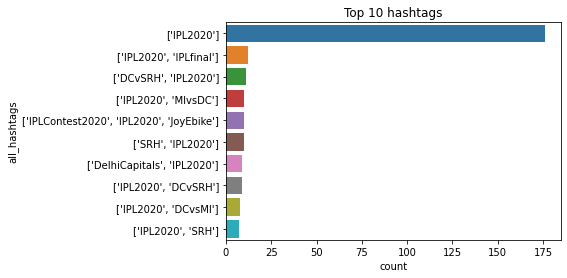

In [126]:
ds = tweets['all_hashtags'].value_counts().reset_index()
ds.columns = ['all_hashtags', 'count']
ds = ds.sort_values(['count'],ascending=False)
fig = sns.barplot(
    x=ds.head(10)["count"], 
    y=ds.head(10)['all_hashtags'], 
    orientation='horizontal', 
    #title='Top 20 hashtags', 
    #width=800, 
    #height=700
).set_title('Top 10 hashtags')

In [127]:
#Functions to clean Tweets

def remove_tag(string):
    tweet_text=re.sub('<.*?>','',string)
    return tweet_text
def remove_mention(tweet_text):
    line=re.sub(r'@\w+','',tweet_text)
    return line
def remove_hash(tweet_text):
    line=re.sub(r'#\w+','',tweet_text)
    return line

def remove_newline(string):
    tweet_text=re.sub('\n','',string)
    return tweet_text
def remove_url(string): 
    tweet_text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',string)
    return tweet_text
def remove_number(tweet_text):
    line=re.sub(r'[0-9]+','',tweet_text)
    return line
def remove_punct(tweet_text):
    line = re.sub(r'[!"\$%&\'()*+,\-.\/:;=#@?\[\\\]^_`{|}~]*','',tweet_text)
    return line
def text_strip(string):
    line=re.sub('\s{2,}', ' ', string.strip())
    return line



In [128]:
!pip install nltk #installing NLTK Package

In [129]:
#Clensing the tweets

import nltk
import json
import csv
import tweepy
import re
import os


tweets['refine_text']=tweets['tweet_text'].str.lower()
tweets['refine_text'] = tweets['refine_text'].str[2:]
tweets['refine_text']=tweets['refine_text'].apply(lambda x:remove_tag(str(x)))
tweets['refine_text']=tweets['refine_text'].apply(lambda x:remove_mention(str(x)))
tweets['refine_text']=tweets['refine_text'].apply(lambda x:remove_hash(str(x)))
tweets['refine_text']=tweets['refine_text'].apply(lambda x:remove_newline(x))
tweets['refine_text']=tweets['refine_text'].apply(lambda x:remove_url(x))
tweets['refine_text']=tweets['refine_text'].apply(lambda x:remove_number(x))
tweets['refine_text']=tweets['refine_text'].apply(lambda x:remove_punct(x))

tweets['refine_text']=tweets['refine_text'].apply(lambda x:text_strip(x))

tweets['text_length']=tweets['refine_text'].str.split().map(lambda x: len(x))

#Remove noise
tweets['refine_text'] = tweets['refine_text'].str.replace('[^\w\s]','')


#Remove stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop.extend(['amp','r','j','v','u','xcxa','via','xexcx','th','ipl','final','v','from','xexcxxefxbxf','xfxfxaxa','xfxfxx','xfxfxcxb','xfxfxxf','xfxfxx', 'xfxfxxd','xfxfxxa','i','the','we','it', 'subject', 're', 'edu', 'use'])
tweets['refine_text'] = tweets['refine_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))



#stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
tweets['refine_text'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

#lemmatization
!pip install -U textblob
from textblob import Word
import nltk
nltk.download('wordnet')

tweets['refine_text'] = tweets['refine_text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Requirement already up-to-date: textblob in /usr/local/lib/python3.6/dist-packages (0.15.3)
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [130]:
tweets['refine_text']

0      look youngster priyam garg kane williamson mas...
1                        mrxcxb dangerous animal cricket
2      great thing happen dont stop believing trying ...
3      natarajan made mark yorkers xfxfxxc see play t...
4                           marcus stoinis warning check
                             ...                        
995    congratulation entering final first time keep ...
996    well played ur fight back frm ending rd place ...
997    shikhar dhawan would take another former team ...
998    winning heart art kane williamson artistxexdxa...
999         dilli tu roar macha xfxfxaxxfxfxx made first
Name: refine_text, Length: 1000, dtype: object

In [131]:
#Saaving the clensed data to a new CSV file
tweets.to_csv('clean_tweets.csv') 

In [132]:
# importing pandas module  
import pandas as pd 
  
# importing module for regex 
import re 
# importing numpy module 
import numpy as np
# importing P=mathplot lib
import matplotlib.pyplot as plt
# reading csv file from url  
dat = pd.read_csv("/content/clean_tweets.csv")
selected_columns = dat[["refine_text"]]
data = selected_columns.copy()


In [133]:
# count of occurrence of each team mentions and creating new column 
data["count1"]= data["refine_text"].str.count("csk", re.I) 
data["count2"]= data["refine_text"].str.count( "DC", re.I) 
data["count3"]= data["refine_text"].str.count( "KXIP", re.I) 
data["count4"]= data["refine_text"].str.count( "KKR", re.I) 
data["count5"]= data["refine_text"].str.count( "MI", re.I) 
data["count6"]= data["refine_text"].str.count( "RR", re.I) 
data["count7"]= data["refine_text"].str.count( "RCB", re.I) 
data["count8"]= data["refine_text"].str.count( "SRH", re.I)

In [134]:
# count of occurrence of each team mention with their state name and creating new column 
data["count11"]= data["refine_text"].str.count("Chennai", re.I) 
data["count22"]= data["refine_text"].str.count( "Delhi", re.I) 
data["count33"]= data["refine_text"].str.count( "Punjab", re.I) 
data["count44"]= data["refine_text"].str.count( "Kolkata", re.I) 
data["count55"]= data["refine_text"].str.count( "Mumbai", re.I) 
data["count66"]= data["refine_text"].str.count( "Rajasthan", re.I) 
data["count77"]= data["refine_text"].str.count( "Bangalore", re.I) 
data["count88"]= data["refine_text"].str.count( "Hyderabad", re.I)

In [135]:
#aggrigating the total mentions
data["csk"] = data["count1"] + data["count11"]
data["DC"] = data["count2"] + data["count22"]
data["KXIP"]= data["count3"] + data["count33"]
data["KKR"]= data["count4"] + data["count44"]
data["MI"]= data["count5"] + data["count55"]
data["RR"]= data["count6"] + data["count66"]
data["RCB"]= data["count7"] + data["count77"]
data["SRH"]= data["count8"] + data["count88"]

In [136]:
data

,refine_text,count1,count2,count3,count4,count5,count6,count7,count8,count11,count22,count33,count44,count55,count66,count77,count88,csk,DC,KXIP,KKR,MI,RR,RCB,SRH
0,look youngster priyam garg kane williamson mas...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,mrxcxb dangerous animal cricket,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,great thing happen dont stop believing trying ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,natarajan made mark yorkers xfxfxxc see play t...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,marcus stoinis warning check,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,congratulation entering final first time keep ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,well played ur fight back frm ending rd place ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,shikhar dhawan would take another former team ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,winning heart art kane williamson artistxexdxa...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [137]:
#dropping the previous count coloumns to clean the dataframe
data1=data.drop(['count1', 'count11','count2','count22','count3','count33','count4','count44','count5','count55','count6','count66','count7','count77','count8','count88'], axis=1)

In [138]:
#aggrigating the total mentions team wise and saving the results to a dictionary
dict = data1.sum(axis = 0, skipna = True)

In [139]:
dict

csk      53.0
DC      261.0
KXIP     23.0
KKR      19.0
MI      296.0
RR       76.0
RCB      69.0
SRH      97.0
dtype: float64

In [140]:
#saving the values to an array to use the results to plot
y= dict.values
#z =np.delete(y, 0, 0)
y.tolist()


[53.0, 261.0, 23.0, 19.0, 296.0, 76.0, 69.0, 97.0]

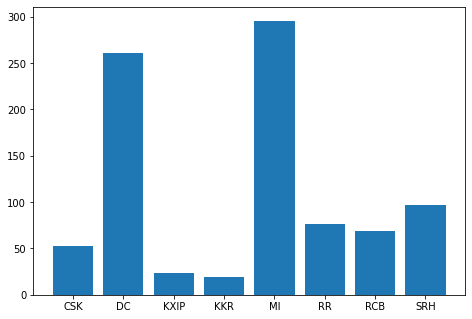

In [141]:
#plotting the results
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
q = ["CSK" ,"DC","KXIP", "KKR","MI","RR","RCB","SRH"]
ax.bar(q,y)
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


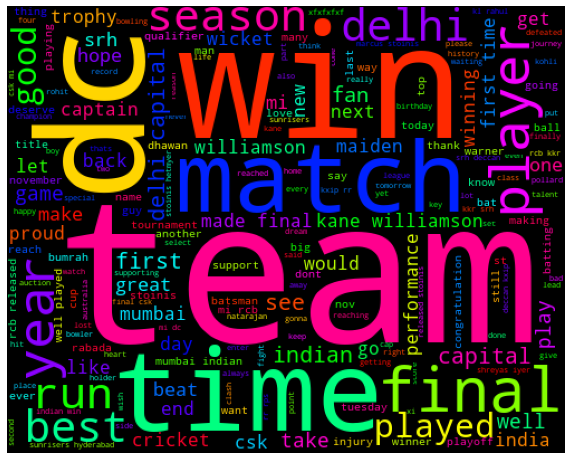

In [142]:
#Importing the packages
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from textblob import TextBlob
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('stopwords')


#Building a word cloud:
words = pd.Series(tweets["refine_text"].tolist()).astype(str)

stop_words = ["https", "co", "rt"]
stop = set(stopwords.words('english'))

for i in range(0, len(words)):
    words[i] = " ".join([x for x in words[i].lower().split() if x not in stop_words])
    words[i] = " ".join([x for x in words[i].lower().split() if x not in stop])

stop = set(stopwords.words('english'))    
cloud = WordCloud(width=500, height=400,
                  stopwords=(stop), 
                  colormap='hsv').generate(''.join(words.astype(str)))
plt.figure(figsize=(10, 10))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [143]:

import numpy as np 
import pandas as pd 
import os
import itertools

#plots
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer

from PIL import Image
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))
from nltk.util import ngrams



def ngram_df(corpus,nrange,n=None):
    vec = CountVectorizer(stop_words = 'english',ngram_range=nrange).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    total_list=words_freq[:n]
    df=pd.DataFrame(total_list,columns=['text','count'])
    return df
unigram_df=ngram_df(tweets['refine_text'],(1,1),20)
bigram_df=ngram_df(tweets['refine_text'],(2,2),20)
trigram_df=ngram_df(tweets['refine_text'],(3,3),20)

In [144]:
bigram_df=ngram_df(tweets['refine_text'],(2,2),20)
trigram_df=ngram_df(tweets['refine_text'],(3,3),20)
fig = make_subplots(
    rows=3, cols=1,subplot_titles=("Unigram","Bigram",'Trigram'),
    specs=[[{"type": "scatter"}],
           [{"type": "scatter"}],
           [{"type": "scatter"}]
          ])

fig.add_trace(go.Bar(
    y=unigram_df['text'][::-1],
    x=unigram_df['count'][::-1],
    marker={'color': "blue"},  
    text=unigram_df['count'],
    textposition = "outside",
    orientation="h",
    name="Months",
),row=1,col=1)

fig.add_trace(go.Bar(
    y=bigram_df['text'][::-1],
    x=bigram_df['count'][::-1],
    marker={'color': "blue"},  
    text=bigram_df['count'],
     name="Days",
    textposition = "outside",
    orientation="h",
),row=2,col=1)

fig.add_trace(go.Bar(
    y=trigram_df['text'][::-1],
    x=trigram_df['count'][::-1],
    marker={'color': "blue"},  
    text=trigram_df['count'],
     name="Days",
    orientation="h",
    textposition = "outside",
),row=3,col=1)

fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(title_text='Top N Grams',xaxis_title=" ",yaxis_title=" ",
                  showlegend=False,title_x=0.5,height=1200,template="plotly_dark")
fig.show()

In [145]:
#sentimmental Analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

from nltk import tokenize
import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

tweets['sentiment_compound_polarity']=tweets.refine_text.apply(lambda x:sid.polarity_scores(x)['compound'])
tweets['sentiment_neutral']=tweets.refine_text.apply(lambda x:sid.polarity_scores(x)['neu'])
tweets['sentiment_negative']=tweets.refine_text.apply(lambda x:sid.polarity_scores(x)['neg'])
tweets['sentiment_pos']=tweets.refine_text.apply(lambda x:sid.polarity_scores(x)['pos'])
tweets['sentiment_type']=''
tweets.loc[tweets.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
tweets.loc[tweets.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
tweets.loc[tweets.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'
tweets.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,created,user_location,tweet_text,username,all_hashtags,refine_text,text_length,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type
0,11/9/2020 4:49,Gotham City,b'Look at #SRH youngster Priyam Garg after Kan...,b'SteadyTheShip',"['SRH', 'SRHvDC', 'DCvSRH', 'IPL2020']",look youngster priyam garg kane williamson mas...,40,0.6969,0.720,0.062,0.218,POSITIVE
1,11/9/2020 4:49,"Bengaluru South, India",b'This is Mr.360\xc2\xb0 @ABdeVilliers17 . Mos...,b'imsapien',"['Cricket', 'IPL2020', 'Eliminater', 'IPLQuali...",mrxcxb dangerous animal cricket,9,-0.4767,0.492,0.508,0.000,NEGATIVE
2,11/9/2020 4:48,"Chennai, India","b""Great things happen to those who don't stop ...",b'CricketGirl_45',"['RohitSharma', 'MumbaiIndians', 'IPL2020', 'I...",great thing happen dont stop believing trying ...,21,0.9134,0.356,0.000,0.644,POSITIVE
3,11/9/2020 4:48,"Chennai, India",b'T Natarajan made a mark with his yorkers in ...,b'ESPNcricinfo',['IPL2020'],natarajan made mark yorkers xfxfxxc see play t...,19,0.3400,0.789,0.000,0.211,POSITIVE
4,11/9/2020 4:47,"Kerala, India",b'#IPL2020 Final: Marcus Stoinis warning to @m...,b'InsideSportIND',"['IPL2020', 'iplseason13', 'IPLfinal', 'Mumbai...",marcus stoinis warning check,7,-0.3400,0.556,0.444,0.000,NEGATIVE


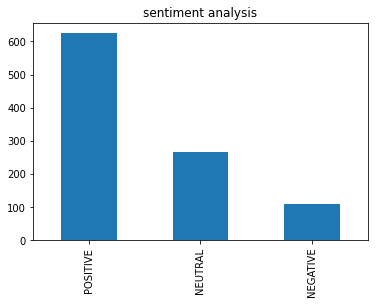

In [146]:
tweets.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")

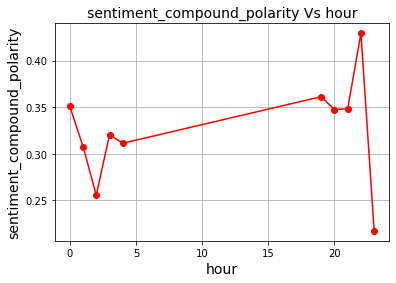

In [148]:
#Polarity of tweets hour wise
import pandas as pd
import matplotlib.pyplot as plt

tweets['hour'] = pd.DatetimeIndex(tweets['created']).hour
tweets['date'] = pd.DatetimeIndex(tweets['created']).date
tweets['minute'] = pd.DatetimeIndex(tweets['created']).minute
df=(tweets.groupby('hour',as_index=False).sentiment_compound_polarity.mean())
  
plt.plot(df['hour'], df['sentiment_compound_polarity'], color='red', marker='o')
plt.title('sentiment_compound_polarity Vs hour', fontsize=14)
plt.xlabel('hour', fontsize=14)
plt.ylabel('sentiment_compound_polarity', fontsize=14)
plt.grid(True)
plt.show()

In [27]:
pip install pyLDAvis

     |████████████████████████████████| 1.6MB 7.2MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=d9aff3dabcd540376b69a49da9324c5eb4f78b982a41cc1ec8a4de66b45e2a12
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


**TOPIC MODELLING**

In [149]:
import gensim #the library for Topic modelling
from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora, models
import pyLDAvis.gensim #LDA visualization library

from nltk.corpus import stopwords
import string
from nltk.stem.wordnet import WordNetLemmatizer

import warnings
warnings.simplefilter('ignore')
from itertools import chain

In [150]:

#spliting the data
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def split(text):
    stop_free = ' '.join([word for word in str(text).lower().split() if word not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = ' '.join([lemma.lemmatize(word) for word in punc_free.split()])
    return normalized.split()

In [151]:
data['text_split']=data['refine_text'].apply(split)

In [152]:
#create dictionary
dictionary = corpora.Dictionary(data['text_split'])
#Total number of non-zeroes in the BOW matrix (sum of the number of unique words per document over the entire corpus).
print(dictionary.num_nnz)

9397


In [153]:

#create document term matrix
doc_term_matrix = [dictionary.doc2bow(doc) for doc in data['text_split'] ]
print(len(doc_term_matrix))

1000


In [33]:
lda = gensim.models.ldamodel.LdaModel

In [154]:
num_topics=10
%time ldamodel = lda(doc_term_matrix,num_topics=num_topics,id2word=dictionary,passes=50,minimum_probability=0)

CPU times: user 23 s, sys: 12.8 ms, total: 23 s
Wall time: 23.1 s


In [155]:
ldamodel.print_topics(num_topics=num_topics)

[(0,
  '0.027*"mi" + 0.020*"dc" + 0.017*"well" + 0.012*"injured" + 0.011*"rcb" + 0.010*"team" + 0.010*"srh" + 0.009*"match" + 0.009*"time" + 0.007*"rr"'),
 (1,
  '0.018*"team" + 0.011*"season" + 0.010*"back" + 0.010*"win" + 0.009*"get" + 0.008*"williamson" + 0.007*"great" + 0.007*"end" + 0.007*"time" + 0.006*"day"'),
 (2,
  '0.019*"team" + 0.018*"take" + 0.018*"run" + 0.011*"dhawan" + 0.009*"win" + 0.008*"final" + 0.008*"wicket" + 0.007*"natarajan" + 0.007*"fan" + 0.007*"go"'),
 (3,
  '0.023*"congratulation" + 0.021*"played" + 0.021*"final" + 0.016*"well" + 0.016*"win" + 0.014*"team" + 0.010*"csk" + 0.010*"play" + 0.010*"winning" + 0.009*"season"'),
 (4,
  '0.054*"delhi" + 0.032*"capital" + 0.027*"final" + 0.026*"time" + 0.023*"win" + 0.022*"mumbai" + 0.020*"indian" + 0.019*"first" + 0.017*"team" + 0.011*"dc"'),
 (5,
  '0.034*"v" + 0.027*"dc" + 0.018*"mi" + 0.016*"fan" + 0.016*"match" + 0.012*"team" + 0.008*"prediction" + 0.006*"big" + 0.006*"qualifier" + 0.006*"xfxfxfxf"'),
 (6,
  '0.

In [156]:
lda_display = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary, sort_topics=False, mds='mmds')
pyLDAvis.display(lda_display)

In [37]:
pip install tomotopy

     |████████████████████████████████| 13.5MB 313kB/s 
     |████████████████████████████████| 102kB 9.6MB/s 
  Created wheel for py-cpuinfo: filename=py_cpuinfo-7.0.0-cp36-none-any.whl size=20071 sha256=55e578388030b93804ebdffd471172bb2a60f99416cb515af6023a0ae4cc6d11
  Stored in directory: /root/.cache/pip/wheels/f1/93/7b/127daf0c3a5a49feb2fecd468d508067c733fba5192f726ad1
Successfully built py-cpuinfo


**Supervised LDA** Reference code taken: https://github.com/bab2min/tomotopy

In [157]:
import tomotopy as tp
SLDA_topic_modeling = tp.SLDAModel(k=15) #number of topics 6
for i in tweets["refine_text"]:
    SLDA_topic_modeling.add_doc(i.split()) #splitting each sentence

for k in range(SLDA_topic_modeling.k):
    print('Top 10 words of topic #{}'.format(k))
    print(SLDA_topic_modeling.get_topic_words(k, top_n=20))

SLDA_topic_modeling.summary()

Top 10 words of topic #0
[('team', 0.01764618046581745), ('final', 0.01628982648253441), ('delhi', 0.01628982648253441), ('time', 0.014933470636606216), ('mi', 0.012220760807394981), ('first', 0.01086440496146679), ('win', 0.009508050046861172), ('match', 0.009508050046861172), ('played', 0.009508050046861172), ('rcb', 0.009508050046861172), ('back', 0.008151695132255554), ('congratulation', 0.008151695132255554), ('good', 0.008151695132255554), ('well', 0.008151695132255554), ('dc', 0.008151695132255554), ('season', 0.006795339751988649), ('indian', 0.006795339751988649), ('mumbai', 0.006795339751988649), ('capital', 0.006795339751988649), ('v', 0.006795339751988649)]
Top 10 words of topic #1
[('win', 0.022097250446677208), ('team', 0.01768074557185173), ('dc', 0.016208576038479805), ('time', 0.016208576038479805), ('delhi', 0.014736408367753029), ('run', 0.011792071163654327), ('well', 0.011792071163654327), ('season', 0.011792071163654327), ('play', 0.010319902561604977), ('indian',

**K-means** 

In [158]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vector = TfidfVectorizer()
tfidf = tfidf_vector.fit_transform(tweets["refine_text"].values)
tfidf.shape

(1000, 2711)

In [160]:
from sklearn.cluster import KMeans
model_tfif = KMeans(n_clusters = 10, n_jobs = -1,random_state=99)
model_tfif.fit(tfidf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=99, tol=0.0001, verbose=0)

In [161]:
labels_tfif = model_tfif.labels_
cluster_center_tfif=model_tfif.cluster_centers_

In [162]:
cluster_center_tfif

array([[0.00051286, 0.        , 0.00189733, ..., 0.00046739, 0.        ,
        0.00044525],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00367482, 0.0065745 , ..., 0.        , 0.00315616,
        0.        ]])

In [163]:
words = tfidf_vector.get_feature_names()

In [164]:
from sklearn import metrics
silhouette_score_tfif = metrics.silhouette_score(tfidf, labels_tfif, metric='euclidean')

In [165]:
silhouette_score_tfif

0.014400088854713158

In [166]:
df_tfif = tweets
df_tfif['Tfidf cluster Labels'] = model_tfif.labels_
df_tfif.head(5)

,created,user_location,tweet_text,username,all_hashtags,refine_text,text_length,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type,hour,date,minute,Tfidf cluster Labels
0,11/9/2020 4:49,Gotham City,b'Look at #SRH youngster Priyam Garg after Kan...,b'SteadyTheShip',"['SRH', 'SRHvDC', 'DCvSRH', 'IPL2020']",look youngster priyam garg kane williamson mas...,40,0.6969,0.720,0.062,0.218,POSITIVE,4,2020-11-09,49,9
1,11/9/2020 4:49,"Bengaluru South, India",b'This is Mr.360\xc2\xb0 @ABdeVilliers17 . Mos...,b'imsapien',"['Cricket', 'IPL2020', 'Eliminater', 'IPLQuali...",mrxcxb dangerous animal cricket,9,-0.4767,0.492,0.508,0.000,NEGATIVE,4,2020-11-09,49,0
2,11/9/2020 4:48,"Chennai, India","b""Great things happen to those who don't stop ...",b'CricketGirl_45',"['RohitSharma', 'MumbaiIndians', 'IPL2020', 'I...",great thing happen dont stop believing trying ...,21,0.9134,0.356,0.000,0.644,POSITIVE,4,2020-11-09,48,0
3,11/9/2020 4:48,"Chennai, India",b'T Natarajan made a mark with his yorkers in ...,b'ESPNcricinfo',['IPL2020'],natarajan made mark yorkers xfxfxxc see play t...,19,0.3400,0.789,0.000,0.211,POSITIVE,4,2020-11-09,48,0
4,11/9/2020 4:47,"Kerala, India",b'#IPL2020 Final: Marcus Stoinis warning to @m...,b'InsideSportIND',"['IPL2020', 'iplseason13', 'IPLfinal', 'Mumbai...",marcus stoinis warning check,7,-0.3400,0.556,0.444,0.000,NEGATIVE,4,2020-11-09,47,0


In [167]:
df_tfif.groupby(['Tfidf cluster Labels'])['refine_text'].count()

Tfidf cluster Labels
0    508
1     13
2     49
3     55
4     50
5     64
6     51
7     69
8     33
9    108
Name: refine_text, dtype: int64

In [168]:

print("Top words per cluster:")
order_centroids = model_tfif.cluster_centers_.argsort()[:, ::-1]
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % words[ind], end='')
        print()

Top words per cluster:
Cluster 0: congratulation
 one
 season
 champion
 year
 fan
 match
 run
 wicket
 trophy
Cluster 1: csk
 rps
 kkr
 deccan
 kxip
 rr
 srh
 mi
 rcb
 final
Cluster 2: win
 always
 lose
 life
 retweet
 time
 like
 wish
 first
 hope
Cluster 3: capital
 delhi
 maiden
 run
 qualifier
 hyderabad
 sunrisers
 join
 first
 time
Cluster 4: title
 qualifier
 tuesday
 first
 lost
 match
 face
 final
 win
 beat
Cluster 5: final
 finally
 time
 congratulation
 first
 delhi
 see
 qualified
 trophy
 made
Cluster 6: well
 played
 congratulation
 team
 better
 boy
 proud
 match
 done
 next
Cluster 7: dc
 mi
 rcb
 time
 csk
 released
 final
 made
 srh
 fan
Cluster 8: mumbai
 indian
 win
 capital
 join
 delhi
 year
 meet
 winner
 time
Cluster 9: player
 team
 williamson
 kane
 injured
 best
 season
 fan
 good
 back


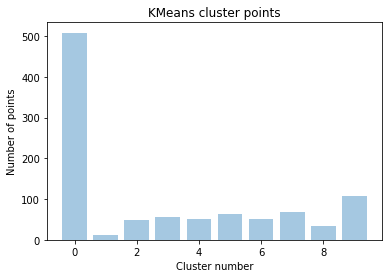

In [169]:
import matplotlib.pyplot as plt
plt.bar([x for x in range(10)], df_tfif.groupby(['Tfidf cluster Labels'])['refine_text'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

**Classification Algorithms**

**SVM**




In [170]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf, tweets["sentiment_type"], test_size=0.2,random_state=109)

In [178]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
train, test = sklearn.model_selection.train_test_split(tweets, train_size=0.8, test_size=0.2)
svm_pipeline = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LinearSVC())])
svm = svm_pipeline.fit(train['refine_text'], train['sentiment_type'])
test['predicted sentiment'] = svm.predict(test['refine_text'])

In [172]:
print('TFIDF-BASED SVM SENTIMENT ANALYSIS:', '\n')
print(test[['refine_text', 'sentiment_type', 'predicted sentiment']].head(10))
svm_recall = recall_score(test['sentiment_type'], test['predicted sentiment'], average='macro')
svm_precision = precision_score(test['sentiment_type'], test['predicted sentiment'], average='macro')
svm_accuracy = accuracy_score(test['sentiment_type'], test['predicted sentiment'])*100
svm_f1 = f1_score(test['sentiment_type'], test['predicted sentiment'], average='macro')
print('Accuracy of svm :', svm_accuracy)
print('f1-score of svm :', svm_f1)
print('Precision score of svm :', svm_precision)
print('Recall score of svm :', svm_recall)

TFIDF-BASED SVM SENTIMENT ANALYSIS: 

                                           refine_text  ... predicted sentiment
404                                could beaten easily  ...            POSITIVE
20   feeling sad think ind v nz runner au v nz wc f...  ...            POSITIVE
86                                another season proud  ...            POSITIVE
519  wicket season dwayne bravo kagiso rabada lasit...  ...             NEUTRAL
793                 taken season reach maiden congrats  ...            POSITIVE
846  started supporting viru gauti used open mcgrat...  ...            POSITIVE
668  rcb dc reached final many year change made tea...  ...             NEUTRAL
578  xfxfxxaxfxfxxba australia marcus stoinis warmi...  ...            POSITIVE
680                                                win  ...            POSITIVE
992  marcus stoinis nailed show ball bat picking ba...  ...             NEUTRAL

[10 rows x 3 columns]
Accuracy of svm : 71.0
f1-score of svm : 0.5661567164179105

**MULTINOMIAL NAIVE BAYES**

In [179]:

nb_pipeline = Pipeline([('vect', CountVectorizer()),
                        ('tfidf', TfidfTransformer()),
                        ('clf', MultinomialNB())])
nb = nb_pipeline.fit(train['refine_text'], train['sentiment_type'])
test['nb predicted sentiment'] = nb.predict(test['refine_text'])

In [180]:
print('\n', 'MultinomialNB SENTIMENT ANALYSIS:', '\n')
print(test[['refine_text', 'sentiment_type', 'nb predicted sentiment']].head(10))
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
nb_recall = recall_score(test['sentiment_type'], test['nb predicted sentiment'], average='macro')
nb_precision = precision_score(test['sentiment_type'], test['nb predicted sentiment'], average='macro')
nb_accuracy = accuracy_score(test['sentiment_type'], test['nb predicted sentiment'])*100
nb_f1 = f1_score(test['sentiment_type'], test['nb predicted sentiment'], average='macro')

print('Accuracy of MultinomialNB:', nb_accuracy)
print('f1-score of MultinomialNB:', nb_f1)
print('Precision score of MultinomialNB:', nb_precision)
print('Recall score of  MultinomialNB:', nb_recall)


 MultinomialNB SENTIMENT ANALYSIS: 

                                           refine_text  ... nb predicted sentiment
698  stoinis man take first xfxfxxaa special perfor...  ...               POSITIVE
4                         marcus stoinis warning check  ...               POSITIVE
203                        delhi ke chole bhature join  ...               POSITIVE
140  top team table playing well played really hard...  ...               POSITIVE
798     abdul samad hit six v norje v bumrah v cummins  ...               POSITIVE
619            batsman win match bowler win tournament  ...               POSITIVE
237                                       wt highlight  ...               POSITIVE
513  real heart break everyone u anyway long wonder...  ...               POSITIVE
978  never back big stage whether critical situatio...  ...               POSITIVE
421  delhi v mumbai called long back episode sports...  ...               POSITIVE

[10 rows x 3 columns]
Accuracy of MultinomialNB:

**GRADIENT BOOSTING**

In [181]:
from sklearn.ensemble import GradientBoostingClassifier
gbpln = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', GradientBoostingClassifier(n_estimators=200,verbose=30))])
gb = gbpln.fit(train['refine_text'], train['sentiment_type'])
test['GB predicted sentiment'] = gb.predict(test['refine_text'])

      Iter       Train Loss   Remaining Time 
         1         691.3705            2.38s
         2         673.7685            2.35s
         3         658.9098            2.45s
         4         645.3990            2.58s
         5         633.6244            2.51s
         6         621.7345            2.47s
         7         612.8142            2.41s
         8         604.1359            2.40s
         9         595.0521            2.38s
        10         587.6922            2.34s
        11         579.6022            2.34s
        12         571.2708            2.33s
        13         563.6481            2.31s
        14         556.3329            2.29s
        15         550.7362            2.27s
        16         544.0024            2.25s
        17         538.7549            2.25s
        18         533.1211            2.24s
        19         527.6800            2.22s
        20         522.7511            2.20s
        21         517.8159            2.18s
        2

In [182]:
print('GRADIENTBOOSTING SENTIMENT ANALYSIS:', '\n')
print(test[['refine_text', 'sentiment_type', 'GB predicted sentiment']].head(10))

gb_recall = recall_score(test['sentiment_type'], test['GB predicted sentiment'], average='macro')
gb_precision = precision_score(test['sentiment_type'], test['GB predicted sentiment'], average='macro')
gb_accuracy = accuracy_score(test['sentiment_type'], test['GB predicted sentiment'])*100
gb_f1 = f1_score(test['sentiment_type'], test['GB predicted sentiment'], average='macro')

print('Accuracy of GradientBoosting:', gb_accuracy)
print('f1-score of GradientBoosting:', gb_f1)
print('Precision score of GradientBoosting:', gb_precision)
print('Recall score of GradientBoosting:', gb_recall)

GRADIENTBOOSTING SENTIMENT ANALYSIS: 

                                           refine_text  ... GB predicted sentiment
698  stoinis man take first xfxfxxaa special perfor...  ...               POSITIVE
4                         marcus stoinis warning check  ...               NEGATIVE
203                        delhi ke chole bhature join  ...               POSITIVE
140  top team table playing well played really hard...  ...               POSITIVE
798     abdul samad hit six v norje v bumrah v cummins  ...               POSITIVE
619            batsman win match bowler win tournament  ...               POSITIVE
237                                       wt highlight  ...               POSITIVE
513  real heart break everyone u anyway long wonder...  ...               POSITIVE
978  never back big stage whether critical situatio...  ...               POSITIVE
421  delhi v mumbai called long back episode sports...  ...               POSITIVE

[10 rows x 3 columns]
Accuracy of GradientBoost

**RANDOM FOREST**

In [183]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
pln = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', RandomForestClassifier(n_estimators=100))])
rf = pln.fit(train['refine_text'], train['sentiment_type'])
test['GB predicted sentiment'] = rf.predict(test['refine_text'])

In [186]:
print('RANDOM FOREST SENTIMENT ANALYSIS:', '\n')
print(test[['refine_text', 'sentiment_type', 'GB predicted sentiment']].head(10))

rf_recall = recall_score(test['sentiment_type'], test['GB predicted sentiment'], average='macro')
rf_precision = precision_score(test['sentiment_type'], test['GB predicted sentiment'], average='macro')
rf_accuracy = accuracy_score(test['sentiment_type'], test['GB predicted sentiment'])*100
rf_f1 = f1_score(test['sentiment_type'], test['GB predicted sentiment'], average='macro')

print('Accuracy of RandomForest:', rf_accuracy)
print('f1-score of RandomForest:', rf_f1)
print('Precision score of RandomForest:', rf_precision)
print('Recall score of RandomForest:', rf_recall)

RANDOM FOREST SENTIMENT ANALYSIS: 

                                           refine_text  ... GB predicted sentiment
698  stoinis man take first xfxfxxaa special perfor...  ...               POSITIVE
4                         marcus stoinis warning check  ...                NEUTRAL
203                        delhi ke chole bhature join  ...               POSITIVE
140  top team table playing well played really hard...  ...               POSITIVE
798     abdul samad hit six v norje v bumrah v cummins  ...                NEUTRAL
619            batsman win match bowler win tournament  ...               POSITIVE
237                                       wt highlight  ...                NEUTRAL
513  real heart break everyone u anyway long wonder...  ...               POSITIVE
978  never back big stage whether critical situatio...  ...                NEUTRAL
421  delhi v mumbai called long back episode sports...  ...                NEUTRAL

[10 rows x 3 columns]
Accuracy of RandomForest: 73